# End to End Classification project using mushroom dataset from Kaggle.

## Introduction:
This notebook provides full Binary classification model to predict if the mushroom is edible or poison based on several mushroom features.

## Project Flow:
1. **Exploratory Data Analysis (EDA):** Filling missing data, drop the column if more than 40% is missing. Understand the data distribution and relations through statistics and visualization.
2. **Data Preprocessing & Feature Engineering:** Capping outliers on numerical features. Encoding and scaling will be handled by the defined pipeline components.
3. **Train/Test split:** Separate the data into training and testing sets.
4. **Pipeline Creation:** Define a comprehensive preprocessing and modeling pipeline using `ColumnTransformer` and a classifier.
5. **Model Training & Hyperparameter Tuning:** Train and evaluate multiple classification algorithms (KNN, Decision Tree, Random Forest, AdaBoost). Optimize the best-performing model using `GridSearchCV`.
6. **Model Evaluation & Selection:** Compare model performance using metrics like Accuracy, Precision, Recall, F1-Score, and ROC-AUC.
7. **Model Persistence & Deployment Simulation:** Save the final model and demonstrate a simple web interface for prediction using Gradio.


# 0.Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Preprocessing & Sampling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report

# Set plot style
sns.set_style('whitegrid')

# 1.Exploratory Data Analysis (EDA)

In [2]:
# Load the dataset
df = pd.read_csv('mushroom.csv')

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Get a summary of the dataframe
print("\nDataset Info:")
df.info()

# Get descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())

First 5 rows of the dataset:


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [3]:
# Drop columns with >40% missing BEFORE split
missing_frac = df.isna().mean()
cols_to_drop = missing_frac[missing_frac > 0.40].index.tolist()
display(cols_to_drop)

['gill-spacing',
 'stem-root',
 'stem-surface',
 'veil-type',
 'veil-color',
 'spore-print-color']

In [4]:
df_cleaned = df.drop(columns=cols_to_drop)
print("Remaining columns:", df_cleaned.columns.tolist())

Remaining columns: ['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']


In [5]:
df_cleaned.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                2471
habitat                     0
season                      0
dtype: int64

In [6]:
df_cleaned['cap-surface'] = df_cleaned['cap-surface'].fillna(df_cleaned['cap-surface'].mode()[0])
df_cleaned['gill-attachment'] = df_cleaned['gill-attachment'].fillna(df_cleaned['gill-attachment'].mode()[0])
df_cleaned['ring-type'] = df_cleaned['ring-type'].fillna(df_cleaned['ring-type'].mode()[0])

In [7]:
df_cleaned.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

## 1.2 Target Variable Analysis and Feature Identification\n,
The distribution of the target variable (`class`) is analyzed to check for class imbalance. Feature lists for numerical and categorical columns are defined for use in the preprocessing pipeline."

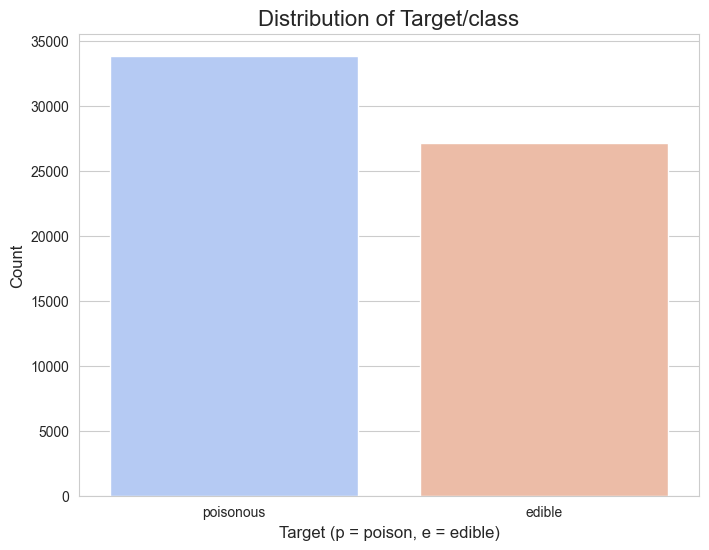

class
p    33888
e    27181
Name: count, dtype: int64
class
p    0.554913
e    0.445087
Name: proportion, dtype: float64


In [8]:
# Analyze the Target Variable (Class)
# Check the data balance

plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df_cleaned, palette='coolwarm', hue='class', legend=False)
plt.title('Distribution of Target/class', fontsize=16)
plt.xlabel('Target (p = poison, e = edible)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['poisonous', 'edible'])
plt.show()

print(df_cleaned['class'].value_counts())
print(df_cleaned['class'].value_counts(normalize=True))

**Insights:**
we have 33888 record of poison mushroom and 27181 record for edible mushroom. it is mostly balance data.

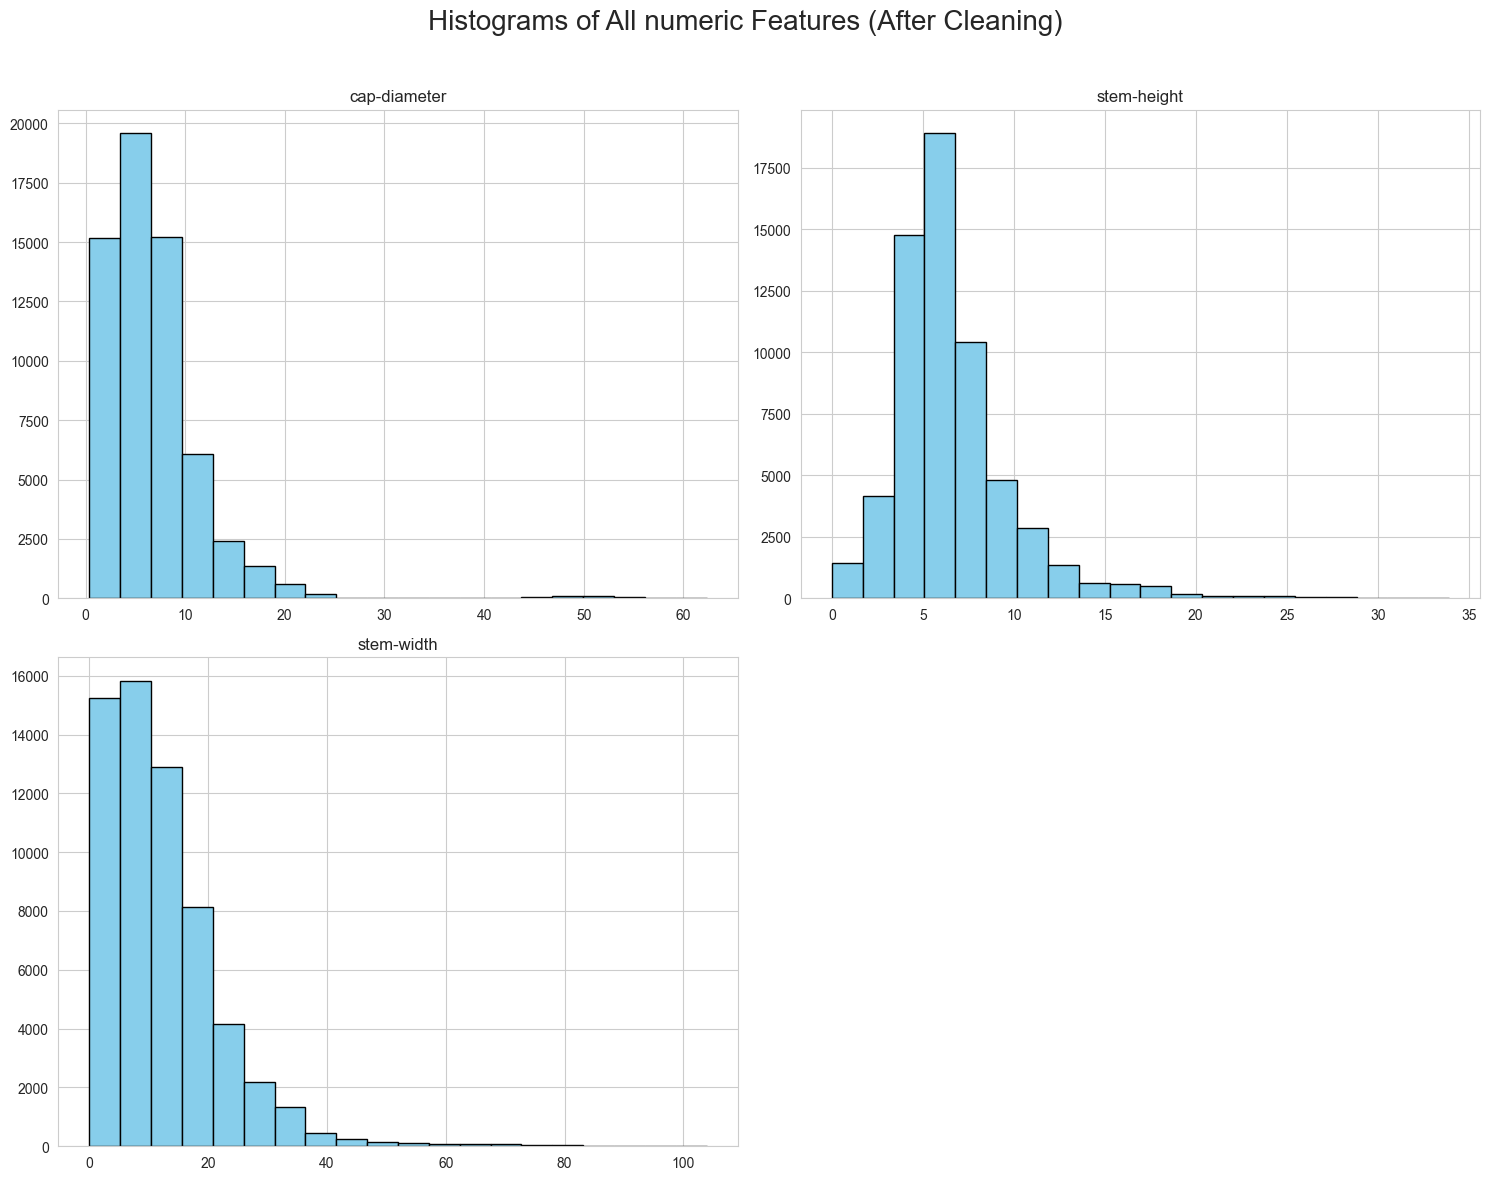

In [9]:
# Plot histograms for each feature
df_cleaned.hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of All numeric Features (After Cleaning)', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show() 

C:\Users\sondo\AppData\Local\Temp\ipykernel_24356\1878127402.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='coolwarm')
C:\Users\sondo\AppData\Local\Temp\ipykernel_24356\1878127402.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='coolwarm')
C:\Users\sondo\AppData\Local\Temp\ipykernel_24356\1878127402.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='coolwarm')
C:\Users\sondo\AppData\Local\Temp\ipykernel_24356\1878127402.py:11:

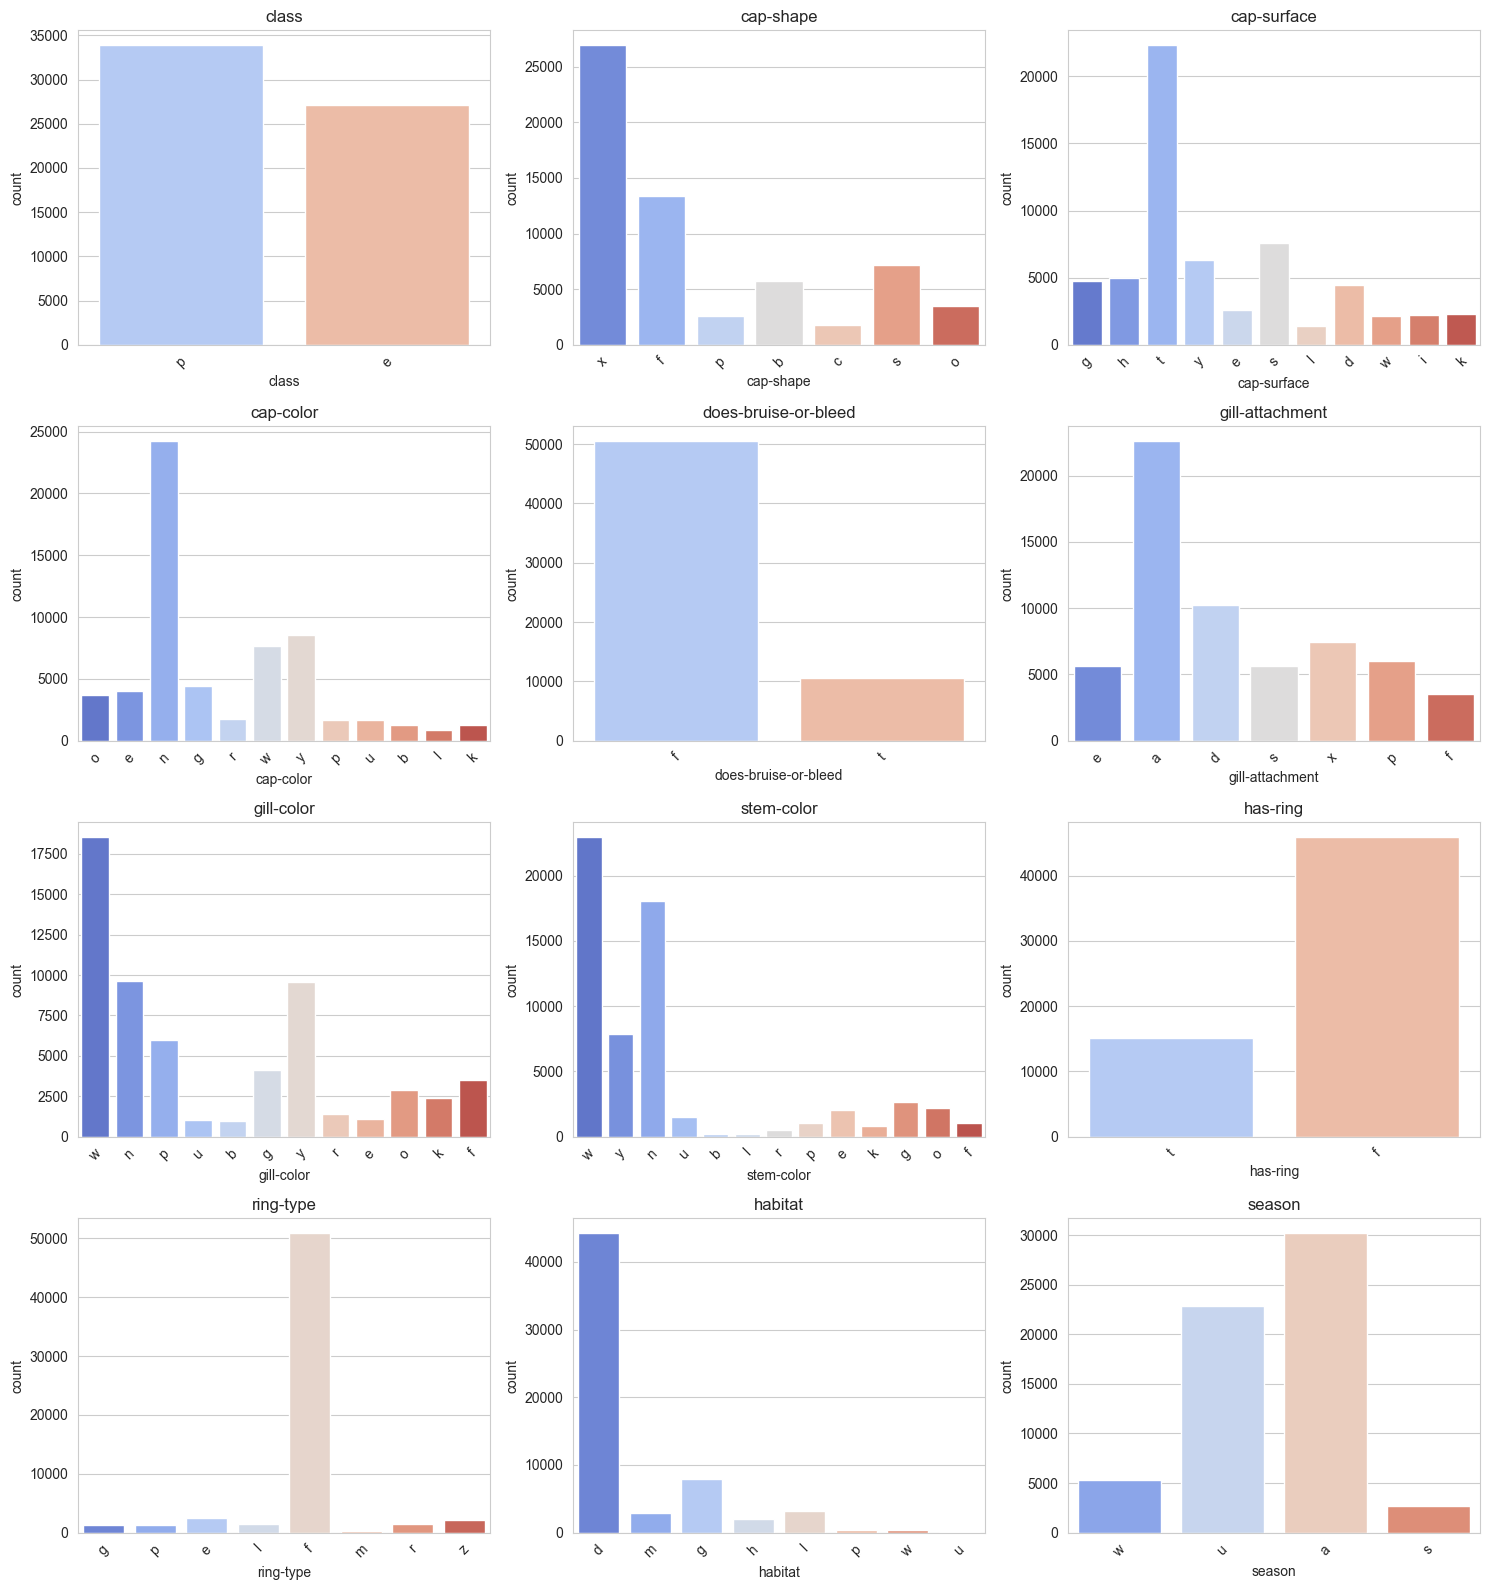

In [10]:
import math

cat_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns
n = len(cat_cols)
rows = math.ceil(n / 3)  # 3 plots per row

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(data=df_cleaned, x=col, palette='coolwarm')
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# 2. Data Preprocessing
**Outlier Capping (Numerical Features)**,
 The numerical features (`cap-diameter`, `stem-height`, and `stem-width`) are analyzed for outliers using boxplots. The outliers will be handled by a capping strategy (e.g., IQR method or manual limits) to mitigate their impact on model training.

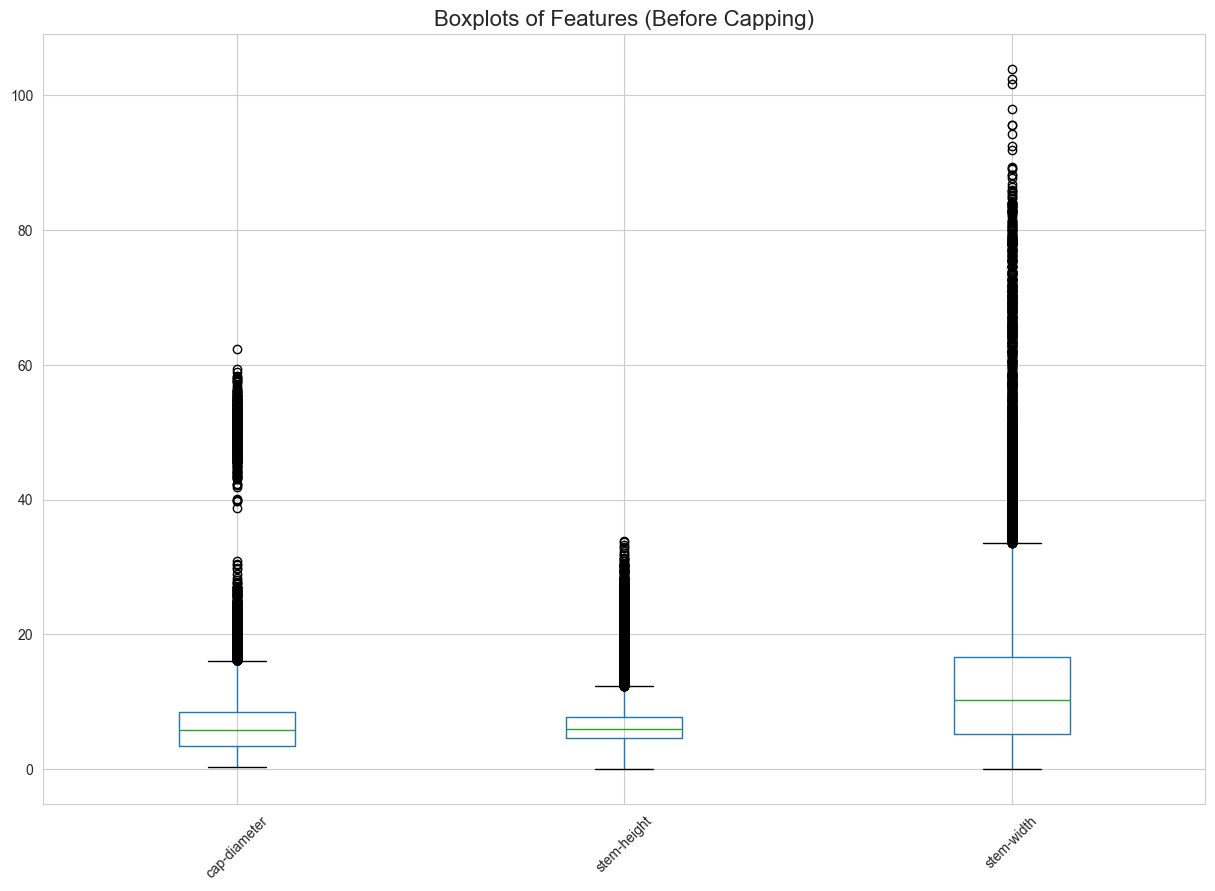

In [11]:
# Plot boxplot for each feature to see outliers
plt.figure(figsize=(15, 10))
df_cleaned.drop('class', axis=1).boxplot()
plt.title('Boxplots of Features (Before Capping)', fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [12]:
# capping the outliers

# Loop over each numeric feature (column) in the dataframe
for col in df_cleaned.columns:
    if df_cleaned[col].dtype != 'object':
        # Calculate the lower bound
        lower_bound = df_cleaned[col].quantile(0.20)
        # Calculate the upper bound
        upper_bound = df_cleaned[col].quantile(0.80)
        
        
        # Clip the column values at the lower and upper bounds
        df_cleaned[col] = np.clip(df_cleaned[col], lower_bound, upper_bound)
print("\nCapping complete.")


Capping complete.


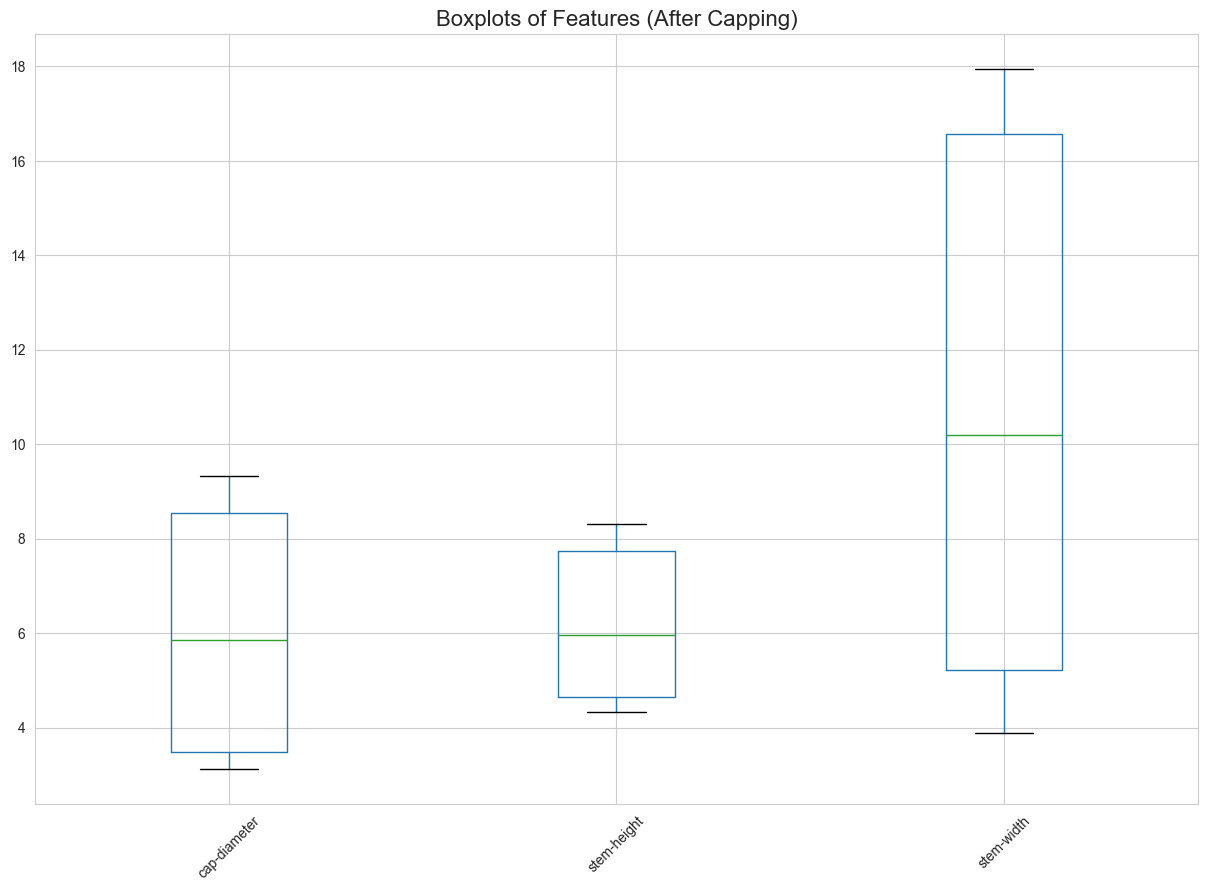

In [13]:
# Plot boxplot again to see the effect of capping
plt.figure(figsize=(15, 10))
df_cleaned.drop('class', axis=1).boxplot()
plt.title('Boxplots of Features (After Capping)', fontsize=16)
plt.xticks(rotation=45)
plt.show()

# 3. Train/Test split
"The cleaned and preprocessed dataset is split into training and testing subsets. The target variable is first encoded using `LabelEncoder` to convert 'e' and 'p' into numerical values (0 and 1) to prepare for model training. The split ensures a fair evaluation of the model's generalization capability."

In [14]:
# Define features (X) and target (y)
X = df_cleaned.drop('class', axis=1)
y = df_cleaned['class']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (61069, 14)
Target (y) shape: (61069,)


In [15]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [16]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

print(f"\nTraining set 'class' distribution:\n{pd.Series(y_train).value_counts(normalize=True)}")
print(f"\nTest set 'class' distribution:\n{pd.Series(y_test).value_counts(normalize=True)}")

Training set shape: (48855, 14)
Test set shape: (12214, 14)

Training set 'class' distribution:
1    0.554907
0    0.445093
Name: proportion, dtype: float64

Test set 'class' distribution:
1    0.554937
0    0.445063
Name: proportion, dtype: float64


In [17]:
# Identify categorical and numeric columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(exclude=['object', 'category']).columns

In [18]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_cat = ohe.fit_transform(X_train[cat_cols])
X_test_cat = ohe.transform(X_test[cat_cols])

# Convert to DataFrame
X_train_cat_df = pd.DataFrame(
    X_train_cat,
    columns=ohe.get_feature_names_out(cat_cols),
    index=X_train.index
)

X_test_cat_df = pd.DataFrame(
    X_test_cat,
    columns=ohe.get_feature_names_out(cat_cols),
    index=X_test.index
)

# Save encoder for later reuse
joblib.dump(ohe, 'onehot_encoder.joblib')
print("OneHotEncoder saved as 'onehot_encoder.joblib'")


OneHotEncoder saved as 'onehot_encoder.joblib'


In [19]:
# Create the scaler
scaler = StandardScaler()

# Fit on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train[num_cols])
X_test_scaled = scaler.transform(X_test[num_cols])

# We will also save this fitted scaler for later use in our final pipeline
joblib.dump(scaler, 'data_scaler.joblib')
print("Data scaler saved as 'data_scaler.joblib'")

Data scaler saved as 'data_scaler.joblib'


In [20]:
# Convert to DataFrame
X_train_num_df = pd.DataFrame(X_train_scaled, columns=num_cols, index=X_train.index)
X_test_num_df = pd.DataFrame(X_test_scaled, columns=num_cols, index=X_test.index)


In [21]:
X_train_final = pd.concat([X_train_num_df, X_train_cat_df], axis=1)
X_test_final = pd.concat([X_test_num_df, X_test_cat_df], axis=1)

print("✅ Final training data shape:", X_train_final.shape)
print("✅ Final testing data shape:", X_test_final.shape)

✅ Final training data shape: (48855, 89)
✅ Final testing data shape: (12214, 89)


In [22]:
results_dict = {}

# 5. Models Training

# Naive Bayes

In [23]:
print("--- 3. Training Naive Bayes ---")
nb = GaussianNB()
nb.fit(X_train_final, y_train)

# Make predictions
y_pred_nb = nb.predict(X_test_final)
y_proba_nb = nb.predict_proba(X_test_final)[:, 1]

# Evaluate and store
print(classification_report(y_test, y_pred_nb))

acc_nb = accuracy_score(y_test, y_pred_nb)
prec_nb = precision_score(y_test, y_pred_nb)
rec_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_proba_nb)
print(f"ROC-AUC Score for Naive Bayes: {roc_auc_nb:.4f}")
results_dict['Naive Bayes'] = [acc_nb, prec_nb, rec_nb, f1_nb, roc_auc_nb]

--- 3. Training Naive Bayes ---
              precision    recall  f1-score   support

           0       0.73      0.56      0.63      5436
           1       0.70      0.83      0.76      6778

    accuracy                           0.71     12214
   macro avg       0.71      0.70      0.70     12214
weighted avg       0.71      0.71      0.70     12214

ROC-AUC Score for Naive Bayes: 0.7840


# Logistic Regression

In [24]:
print("--- 1. Training Logistic Regression ---")
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_final, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_final)
y_proba_log_reg = log_reg.predict_proba(X_test_final)[:, 1]

# Show the full classification report
print(classification_report(y_test, y_pred_log_reg))

# Calculate and store individual metrics
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
prec_log_reg = precision_score(y_test, y_pred_log_reg)
rec_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_proba_log_reg)

results_dict['Logistic Regression'] = [acc_log_reg, prec_log_reg, rec_log_reg, f1_log_reg, roc_auc_log_reg]
print(f"ROC-AUC Score for Logistic Regression: {roc_auc_log_reg:.4f}")  
print("--- Metrics Deep Dive ---")
print(f"Recall (Class 1): {rec_log_reg:.4f}")
print(f"Precision (Class 1): {prec_log_reg:.4f}")

--- 1. Training Logistic Regression ---
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      5436
           1       0.80      0.81      0.80      6778

    accuracy                           0.78     12214
   macro avg       0.78      0.78      0.78     12214
weighted avg       0.78      0.78      0.78     12214

ROC-AUC Score for Logistic Regression: 0.8568
--- Metrics Deep Dive ---
Recall (Class 1): 0.8110
Precision (Class 1): 0.7975


# KNN

In [25]:
print("--- 2. Training K-Nearest Neighbors (KNN) ---")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_final, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test_final)
y_proba_knn = knn.predict_proba(X_test_final)[:, 1]

# Evaluate and store
print(classification_report(y_test, y_pred_knn))

acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)
print(f"ROC-AUC Score for KNN: {roc_auc_knn:.4f}")
results_dict['K-Nearest Neighbors'] = [acc_knn, prec_knn, rec_knn, f1_knn, roc_auc_knn]

--- 2. Training K-Nearest Neighbors (KNN) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5436
           1       1.00      1.00      1.00      6778

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214

ROC-AUC Score for KNN: 0.9997


# Decision Tree

In [26]:
print("--- 4. Training Decision Tree ---")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_final, y_train) 

# Make predictions
y_pred_dt = dt.predict(X_test_final)
y_proba_dt = dt.predict_proba(X_test_final)[:, 1]

# Evaluate and store
print(classification_report(y_test, y_pred_dt))

acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
print(f"ROC-AUC Score for Decision Tree: {roc_auc_dt:.4f}")
results_dict['Decision Tree'] = [acc_dt, prec_dt, rec_dt, f1_dt, roc_auc_dt]

--- 4. Training Decision Tree ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5436
           1       1.00      0.99      1.00      6778

    accuracy                           1.00     12214
   macro avg       0.99      1.00      0.99     12214
weighted avg       1.00      1.00      1.00     12214

ROC-AUC Score for Decision Tree: 0.9970


# Support vector Machine (SVM)

In [27]:
print("--- 5. Training Support Vector Machine (SVM) ---")
# We set probability=True to get predict_proba for ROC AUC score
svm = SVC(random_state=42, probability=True)
svm.fit(X_train_final, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test_final)
y_proba_svm = svm.predict_proba(X_test_final)[:, 1]

# Evaluate and store
print(classification_report(y_test, y_pred_svm))

acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
print(f"ROC-AUC Score for SVM: {roc_auc_svm:.4f}")
results_dict['Support Vector Machine'] = [acc_svm, prec_svm, rec_svm, f1_svm, roc_auc_svm]

--- 5. Training Support Vector Machine (SVM) ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5436
           1       0.99      1.00      1.00      6778

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214

ROC-AUC Score for SVM: 0.9993


# Random Forest

In [28]:
print("--- 6. Training Random Forest (Bagging) ---")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_final, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test_final)
y_proba_rf = rf.predict_proba(X_test_final)[:, 1]

# Evaluate and store
print(classification_report(y_test, y_pred_rf))

acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"ROC-AUC Score for Random Forest: {roc_auc_rf:.4f}")
results_dict['Random Forest'] = [acc_rf, prec_rf, rec_rf, f1_rf, roc_auc_rf]

--- 6. Training Random Forest (Bagging) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5436
           1       1.00      1.00      1.00      6778

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214

ROC-AUC Score for Random Forest: 1.0000


# Ada Boost

In [29]:
print("--- 7. Training AdaBoost (Boosting) ---")
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train_final, y_train)

# Make predictions
y_pred_ada = ada.predict(X_test_final)
y_proba_ada = ada.predict_proba(X_test_final)[:, 1]

# Evaluate and store
print(classification_report(y_test, y_pred_ada))

acc_ada = accuracy_score(y_test, y_pred_ada)
prec_ada = precision_score(y_test, y_pred_ada)
rec_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)
roc_auc_ada = roc_auc_score(y_test, y_pred_ada)
print(f"ROC-AUC Score for AdaBoost: {roc_auc_ada:.4f}")
results_dict['AdaBoost'] = [acc_ada, prec_ada, rec_ada, f1_ada, roc_auc_ada]

--- 7. Training AdaBoost (Boosting) ---
              precision    recall  f1-score   support

           0       0.68      0.65      0.66      5436
           1       0.73      0.76      0.74      6778

    accuracy                           0.71     12214
   macro avg       0.70      0.70      0.70     12214
weighted avg       0.71      0.71      0.71     12214

ROC-AUC Score for AdaBoost: 0.7014


# Models Comparison

In [30]:
# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame.from_dict(results_dict, 
                                        orient='index',
                                     columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'])

results_df = results_df.sort_values(by='ROC AUC', ascending=False)

print("Model Performance Comparison (on Test Set):")
display(results_df)

Model Performance Comparison (on Test Set):


,Accuracy,Precision,Recall,F1-Score,ROC AUC
Random Forest,0.997134,0.998816,0.996017,0.997414,0.999975
K-Nearest Neighbors,0.996807,0.997784,0.996459,0.997121,0.999701
Support Vector Machine,0.995415,0.994119,0.997639,0.995876,0.999297
Decision Tree,0.995006,0.997482,0.993508,0.995491,0.997019
Logistic Regression,0.780825,0.797476,0.811006,0.804184,0.856830
Naive Bayes,0.710169,0.701118,0.832694,0.761262,0.784034
AdaBoost,0.707467,0.727144,0.756860,0.741705,0.701370


# 4. PipeLine creation

In [31]:
# Build preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', StandardScaler(), num_cols)
    ],
    remainder='drop' # Keep any other columns (though we don't have any)
)

In [32]:
# 1. Define the pipeline
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 2. Define the Parameter Grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__bootstrap': [True, False],
}

# 3. Create and Run GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=5,       # 5-fold CV is standard for grid search
    n_jobs=-1,  
    verbose=1   # Set to 1  to see progress
)

print("--- Starting Grid Search for Random Forest ---")
# Fit the grid search on the *original* (unscaled, unencoded) X_train and y_train
grid_search_rf.fit(X_train, y_train)

# 4. Report the Best Results
print("\n--- Grid Search Complete ---")
print(f"Best Parameters Found: {grid_search_rf.best_params_}")
print(f"Best Cross-Validated ROC AUC Score: {grid_search_rf.best_score_:.4f}")

--- Starting Grid Search for Random Forest ---
Fitting 5 folds for each of 144 candidates, totalling 720 fits

--- Grid Search Complete ---
Best Parameters Found: {'classifier__bootstrap': True, 'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Best Cross-Validated ROC AUC Score: 1.0000


In [33]:
# Get the best model from the grid search
final_model = grid_search_rf.best_estimator_

# Make final predictions on the unseen test set
# Note: we use .predict() and .predict_proba() on X_test (unscaled)
# because our 'final_model' is a PIPELINE that includes the scaler and the encoder.
y_pred_final = final_model.predict(X_test)
y_proba_final = final_model.predict_proba(X_test)[:, 1]

# 6. Model Evaluation

--- Detailed Report for Tuned Random Forest ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5436
           1       1.00      1.00      1.00      6778

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



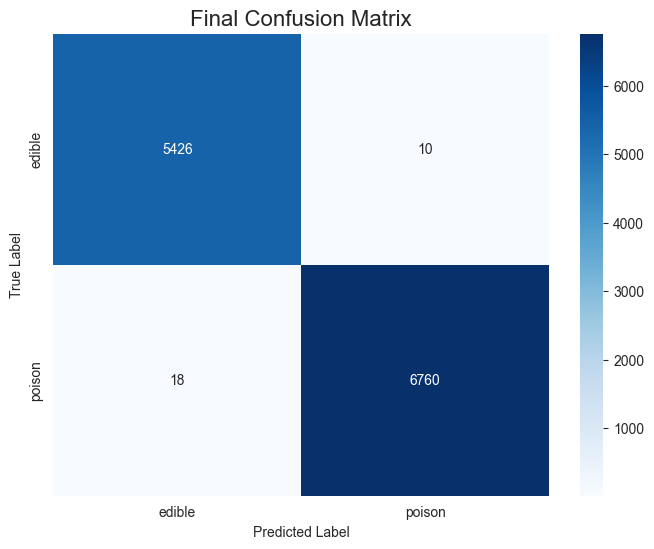

In [34]:
print(f"--- Detailed Report for Tuned Random Forest ---")
print(classification_report(y_test, y_pred_final))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['edible', 'poison'], 
            yticklabels=['edible', 'poison'])
plt.title(f'Final Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

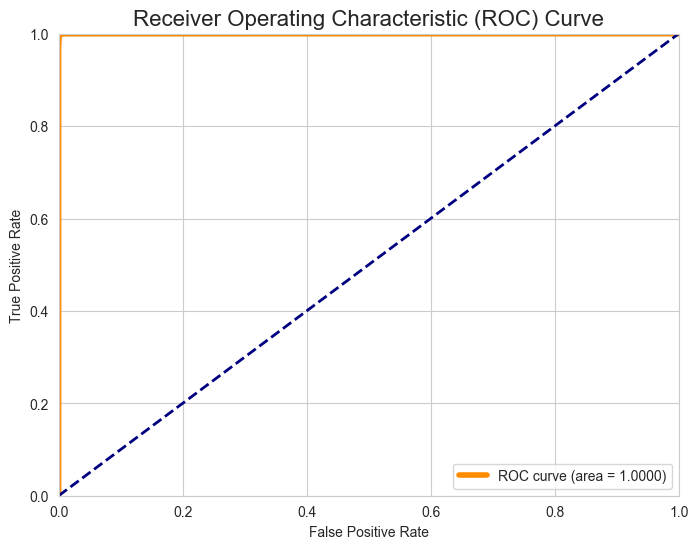

In [35]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_final)
roc_auc = roc_auc_score(y_test, y_proba_final)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=4, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right")
plt.show()

In [36]:
# Save the final pipeline to a file
joblib.dump(final_model, 'final_model_pipeline.joblib')

print("Best model pipeline saved as 'final_model_pipeline.joblib'")

Best model pipeline saved as 'final_model_pipeline.joblib'


# 7.Model Deployment

In [37]:
import pandas as pd
import joblib
import gradio as gr
import io
import numpy as np 

# --- 1. Load Data and Model ---
# NOTE: The model pipeline ('final_model_pipeline.joblib') and the data
# ('mushroom.csv') are assumed to be available in the same directory.

try:
    # Load the model pipeline
    model_pipeline = joblib.load('final_model_pipeline.joblib')
except FileNotFoundError:
    print("Error: 'final_model_pipeline.joblib' not found. Please ensure the model file is present.")
    model_pipeline = None

try:
    # Load the original dataset to extract unique values for dropdowns
    df = pd.read_csv('mushroom.csv')
    
    # Define Numerical Feature Ranges (based on the original data before capping)
    cap_diameter_range = (df['cap-diameter'].min(), df['cap-diameter'].max())
    stem_height_range = (df['stem-height'].min(), df['stem-height'].max())
    stem_width_range = (df['stem-width'].min(), df['stem-width'].max())
    
    # Define Categorical Feature Choices
    cat_features = [
        'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 
        'gill-attachment', 'gill-color', 'stem-color', 'has-ring', 
        'ring-type', 'habitat', 'season'
    ]
    
    # Extract unique values for each feature, dropping NA/NaN
    cat_choices_raw = {col: df[col].dropna().unique().tolist() for col in cat_features}
    
except Exception as e:
    print(f"Error loading 'mushroom.csv' or extracting data: {e}")
    # Provide safe fallback values if the CSV cannot be loaded
    cat_choices_raw = {col: ['x', 'f', 's', 'n'] for col in cat_features} # Simplified fallback
    cap_diameter_range = (0.3, 62.5)
    stem_height_range = (0.0, 34.0)
    stem_width_range = (0.0, 104.0)


# --- 2. Feature Description Mappings ---

# Mapping from code to description for better UI display
FEATURE_MAPS = {
    'cap-shape': {
        'b': 'bell (b)', 'c': 'conical (c)', 'x': 'convex (x)', 'f': 'flat (f)', 
        's': 'sunken (s)', 'p': 'spherical (p)', 'o': 'others (o)'
    },
    'cap-surface': {
        'i': 'fibrous (i)', 'g': 'grooves (g)', 'y': 'scaly (y)', 's': 'smooth (s)', 
        'h': 'shiny (h)', 'l': 'leathery (l)', 'k': 'silky (k)', 't': 'sticky (t)', 
        'w': 'wrinkled (w)', 'e': 'fleshy (e)'
    },
    'cap-color': {
        'n': 'brown (n)', 'b': 'buff (b)', 'g': 'gray (g)', 'r': 'green (r)', 
        'p': 'pink (p)', 'u': 'purple (u)', 'e': 'red (e)', 'w': 'white (w)', 
        'y': 'yellow (y)', 'l': 'blue (l)', 'o': 'orange (o)', 'k': 'black (k)'
    },
    'does-bruise-or-bleed': {
        't': 'True (t) - Bruises/Bleeds', 'f': 'False (f) - No Bruising/Bleeding'
    },
    'gill-attachment': {
        'a': 'adnate (a)', 'x': 'adnexed (x)', 'd': 'decurrent (d)', 'e': 'free (e)', 
        's': 'sinuate (s)', 'p': 'pores (p)', 'f': 'none (f)', '?': 'unknown (?)'
    },
    'gill-color': {
        'n': 'brown (n)', 'b': 'buff (b)', 'g': 'gray (g)', 'r': 'green (r)', 
        'p': 'pink (p)', 'u': 'purple (u)', 'e': 'red (e)', 'w': 'white (w)', 
        'y': 'yellow (y)', 'l': 'blue (l)', 'o': 'orange (o)', 'k': 'black (k)',
        'f': 'none (f)'
    },
    'stem-color': {
        'n': 'brown (n)', 'b': 'buff (b)', 'g': 'gray (g)', 'r': 'green (r)', 
        'p': 'pink (p)', 'u': 'purple (u)', 'e': 'red (e)', 'w': 'white (w)', 
        'y': 'yellow (y)', 'l': 'blue (l)', 'o': 'orange (o)', 'k': 'black (k)',
        'f': 'none (f)', 'z': 'yellow-brown (z)'
    },
    'has-ring': {
        't': 'Yes (t) - Has Ring', 'f': 'No (f) - No Ring'
    },
    'ring-type': {
        'c': 'cobwebby (c)', 'e': 'evanescent (e)', 'f': 'none (f)', 'r': 'flaring (r)', 
        'g': 'grooved (g)', 'l': 'large (l)', 'p': 'pendant (p)', 's': 'sheathing (s)', 
        'z': 'zone (z)', 'y': 'scaly (y)', 'm': 'movable (m)', '?': 'unknown (?)'
    },
    'habitat': {
        'g': 'grasses (g)', 'l': 'leaves (l)', 'm': 'meadows (m)', 'p': 'paths (p)', 
        'h': 'heaths (h)', 'u': 'urban (u)', 'w': 'waste (w)', 'd': 'woods (d)'
    },
    'season': {
        's': 'spring (s)', 'u': 'summer (u)', 'a': 'autumn (a)', 'w': 'winter (w)'
    }
}

# Function to get the display name for a code, falling back to just the code if not mapped
def get_display_choice(feature_name, code):
    if feature_name in FEATURE_MAPS and code in FEATURE_MAPS[feature_name]:
        return FEATURE_MAPS[feature_name][code]
    return str(code)

# Prepare the final choices for Gradio: a list of display names
cat_choices_display = {}
for col, codes in cat_choices_raw.items():
    mapped_choices = sorted([get_display_choice(col, code) for code in codes])
    cat_choices_display[col] = mapped_choices

# Function to extract the code from the display string (e.g., 'convex (x)' -> 'x')
def extract_code(display_string):
    if '(' in display_string and display_string.endswith(')'):
        return display_string.split('(')[-1].strip(')')
    
    # Special handling for simple binary t/f strings
    if display_string.startswith('True (t)') or display_string.startswith('Yes (t)'):
        return 't'
    if display_string.startswith('False (f)') or display_string.startswith('No (f)'):
        return 'f'
    
    # Fallback
    return display_string


# --- 3. Prediction Function ---

def predict_mushroom(cap_diameter, cap_shape, cap_surface, cap_color, does_bruise_or_bleed, gill_attachment, gill_color, stem_height, stem_width, stem_color, has_ring, ring_type, habitat, season):
    """
    Takes feature inputs (as display strings), extracts their codes, formats 
    them into a DataFrame, and predicts edibility.
    """
    if model_pipeline is None:
        return "Model not loaded. Please check the console for errors."

    # Extract the original codes from the display strings
    features_input = {
        'cap-shape': extract_code(cap_shape),
        'cap-surface': extract_code(cap_surface),
        'cap-color': extract_code(cap_color),
        'does-bruise-or-bleed': extract_code(does_bruise_or_bleed),
        'gill-attachment': extract_code(gill_attachment),
        'gill-color': extract_code(gill_color),
        'stem-color': extract_code(stem_color),
        'has-ring': extract_code(has_ring),
        'ring-type': extract_code(ring_type),
        'habitat': extract_code(habitat),
        'season': extract_code(season),
    }

    # Create a dictionary for the DataFrame
    data = {
        'cap-diameter': [cap_diameter],
        'cap-shape': [features_input['cap-shape']],
        'cap-surface': [features_input['cap-surface']],
        'cap-color': [features_input['cap-color']],
        'does-bruise-or-bleed': [features_input['does-bruise-or-bleed']],
        'gill-attachment': [features_input['gill-attachment']],
        'gill-color': [features_input['gill-color']],
        'stem-height': [stem_height],
        'stem-width': [stem_width],
        'stem-color': [features_input['stem-color']],
        'has-ring': [features_input['has-ring']],
        'ring-type': [features_input['ring-type']],
        'habitat': [features_input['habitat']],
        'season': [features_input['season']],
        
        # Include dummy columns for the original pipeline's sake
        'gill-spacing': ['NA'], 
        'stem-root': ['NA'], 
        'stem-surface': ['NA'], 
        'veil-type': ['NA'], 
        'veil-color': ['NA'], 
        'spore-print-color': ['NA']
    }
    
    # Define the required column order
    feature_names_order = [
        'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 
        'gill-attachment', 'gill-spacing', 'gill-color', 'stem-height', 'stem-width', 
        'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 
        'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season'
    ]
    
    # Construct the input DataFrame
    input_df = pd.DataFrame({k: data[k] for k in feature_names_order})

    # Make prediction (0 for Edible, 1 for Poisonous)
    prediction = model_pipeline.predict(input_df)[0]
    prediction_proba = model_pipeline.predict_proba(input_df)[0][prediction]

    # Decode the label
    result = 'Poisonous (P)' if prediction == 1 else 'Edible (E)'
    
    # Format the confidence level
    confidence = f"Confidence: {prediction_proba:.2%}"

    # Use emojis for a friendlier interface
    icon = "🍄💀" if prediction == 1 else "🍄✅"
    
    return f"{icon} Result: {result}\n{confidence}"

# --- 4. Gradio Interface Definition (Updated with new Theme) ---

# Get the initial/default code and then convert it to its display string for the 'value'
def get_default_display_value(feature_name, default_code):
    return get_display_choice(feature_name, default_code)

# Define all 14 input components individually 
input_1 = gr.Slider(minimum=cap_diameter_range[0], maximum=cap_diameter_range[1], value=15.0, label="1. Cap Diameter (cm)", step=0.1, info="Size of the cap from edge to edge.")
input_2 = gr.Dropdown(choices=cat_choices_display.get('cap-shape', ['convex (x)']), value=get_default_display_value('cap-shape', 'x'), label="2. Cap Shape", info="Shape of the mushroom cap.")
input_3 = gr.Dropdown(choices=cat_choices_display.get('cap-surface', ['smooth (s)']), value=get_default_display_value('cap-surface', 's'), label="3. Cap Surface ", info="Texture of the cap's surface.")
input_4 = gr.Dropdown(choices=cat_choices_display.get('cap-color', ['brown (n)']), value=get_default_display_value('cap-color', 'n'), label="4. Cap Color", info="Primary color of the cap.")
input_5 = gr.Dropdown(choices=cat_choices_display.get('does-bruise-or-bleed', ['False (f) - No Bruising/Bleeding']), value=get_default_display_value('does-bruise-or-bleed', 'f'), label="5. Bruises/Bleeds", info="Whether the mushroom changes color or exudes liquid when handled (t: True, f: False).")
input_6 = gr.Dropdown(choices=cat_choices_display.get('gill-attachment', ['free (e)']), value=get_default_display_value('gill-attachment', 'e'), label="6. Gill Attachment", info="How the gills are attached to the stem.")
input_7 = gr.Dropdown(choices=cat_choices_display.get('gill-color', ['white (w)']), value=get_default_display_value('gill-color', 'w'), label="7. Gill Color", info="Color of the mushroom gills.")

input_8 = gr.Slider(minimum=stem_height_range[0], maximum=stem_height_range[1], value=10.0, label="8. Stem Height (cm)", step=0.1, info="Length of the stem.")
input_9 = gr.Slider(minimum=stem_width_range[0], maximum=stem_width_range[1], value=15.0, label="9. Stem Width (mm)", step=0.1, info="Thickness of the stem.")
input_10 = gr.Dropdown(choices=cat_choices_display.get('stem-color', ['white (w)']), value=get_default_display_value('stem-color', 'w'), label="10. Stem Color", info="Primary color of the stem.")
input_11 = gr.Dropdown(choices=cat_choices_display.get('has-ring', ['Yes (t) - Has Ring']), value=get_default_display_value('has-ring', 't'), label="11. Has Ring", info="Presence of a ring/annulus on the stem (t: Yes, f: No).")
input_12 = gr.Dropdown(choices=cat_choices_display.get('ring-type', ['pendant (p)']), value=get_default_display_value('ring-type', 'p'), label="12. Ring Type", info="The specific form of the ring.")
input_13 = gr.Dropdown(choices=cat_choices_display.get('habitat', ['woods (d)']), value=get_default_display_value('habitat', 'd'), label="13. Habitat", info="The environment the mushroom grows in.")
input_14 = gr.Dropdown(choices=cat_choices_display.get('season', ['winter (w)']), value=get_default_display_value('season', 'w'), label="14. Season", info="The predominant season when the mushroom is found.")

# Group the inputs for the function call
iface_inputs = [
    input_1, input_2, input_3, input_4, input_5, input_6, input_7, 
    input_8, input_9, input_10, input_11, input_12, input_13, input_14
]

# Create the Gradio interface using Blocks for custom layout and **changed theme**
with gr.Blocks(theme=gr.themes.Glass(), title="🍄 Mushroom Classifier") as custom_app:
    gr.Markdown("# 🍄 Real-Time Mushroom Edibility Classifier 💀✅")
    gr.Markdown("Select the features of the mushroom to predict if it is Edible (E) or Poisonous (P).")

    with gr.Row():
        # Left Column (Inputs 1-7)
        with gr.Column():
            input_1.render()
            input_2.render()
            input_3.render()
            input_4.render()
            input_5.render()
            input_6.render()
            input_7.render()

        # Right Column (Inputs 8-14)
        with gr.Column():
            input_8.render()
            input_9.render()
            input_10.render()
            input_11.render()
            input_12.render()
            input_13.render()
            input_14.render()

    # Prediction Button and Output
    prediction_output = gr.Textbox(label="Prediction Result", lines=2, show_copy_button=True)
    
    gr.Button("Predict Edibility").click(
        fn=predict_mushroom, 
        inputs=iface_inputs, 
        outputs=prediction_output
    )


# Launch the custom app
custom_app.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.



Gradio application defined successfully with a **two-column layout** and the **Glass theme** (dark mode).
